# Dataset selection

The selected dataset is the *European Soccer Database* which can be found on [Kaggle](https://www.kaggle.com/hugomathien/soccer).

# Dataset exploration
## Required libraries
Since the dataset comes in an SQL format, the required libraries need to be imported:

- **_sqllite3_** for interacting with a local relational database.
- **_pandas_** and **_numpy_** for data ingestion and manipulation.
- **_matplotlib_** for data visualization.

In [1]:
import sqlite3 #To read SQL files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data ingestion
A connection to the data base is created followed by the creation of the *pandas* data frames.

In [2]:
# Connection to SQL data base 
connection = sqlite3.connect('database.sqlite')

# Data frame creation
df_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", connection)
df_players = pd.read_sql_query("SELECT * FROM Player", connection)

## Data exploration

In [3]:
print("Dimensions of df_attr: ", df_attr.shape)
df_attr.head(3)

Dimensions of df_attr:  (183978, 42)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [4]:
print("Dimensions of df_players: ", df_players.shape)
df_players.head(3)

Dimensions of df_players:  (11060, 7)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


# Research question
Since the information about the player's overall rating is a parameter that is really important not only in real life (e.g. to plan and execute transfers) but also is a valuable evaluation parameter for [*FIFA (video game)*](https://en.wikipedia.org/wiki/FIFA_(video_game_series)) players. Therefore, the chosen research question for this Mini-Project is:



**_How are the skills related specially with the player's overall rating?_**

# Data deep exploration and analysis

Which information is contained in the attribute dataset columns?

In [5]:
df_attr.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

## Preparation of working dataset
In order to prepare the final dataset to work with, a merge of the dataset is performed

In [6]:
df = df_players.merge(df_attr, on='player_fifa_api_id', how='inner')
print(df.shape)
df.iloc[0:4,0:6]

(183929, 48)


,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88


Since the dataset is constantly updated, it is expected to have historical statistics of the same player.

In [7]:
# Example: filter sigle player stats
df[df['player_name']=='James Rodriguez']    \
     .head(10)[['player_name', 'overall_rating', 'date']]

,player_name,overall_rating,date
76411,James Rodriguez,87.0,2016-02-18 00:00:00
76412,James Rodriguez,87.0,2015-10-16 00:00:00
76413,James Rodriguez,87.0,2015-09-21 00:00:00
76414,James Rodriguez,86.0,2015-05-01 00:00:00
76415,James Rodriguez,86.0,2014-12-05 00:00:00
76416,James Rodriguez,86.0,2014-11-28 00:00:00
76417,James Rodriguez,86.0,2014-10-31 00:00:00
76418,James Rodriguez,86.0,2014-10-10 00:00:00
76419,James Rodriguez,86.0,2014-09-18 00:00:00
76420,James Rodriguez,83.0,2014-02-07 00:00:00


It is also needed to remove the null/missing values.
First, we check if there are missing values:

In [8]:
init_rows = df.shape[0]
df.isnull().any().any(), df.shape

(True, (183929, 48))

In [9]:
df.isnull().sum(axis=0)

id_x                      0
player_api_id_x           0
player_name               0
player_fifa_api_id        0
birthday                  0
height                    0
weight                    0
id_y                      0
player_api_id_y           0
date                      0
overall_rating          787
potential               787
preferred_foot          787
attacking_work_rate    3181
defensive_work_rate     787
crossing                787
finishing               787
heading_accuracy        787
short_passing           787
volleys                2664
dribbling               787
curve                  2664
free_kick_accuracy      787
long_passing            787
ball_control            787
acceleration            787
sprint_speed            787
agility                2664
reactions               787
balance                2664
shot_power              787
jumping                2664
stamina                 787
strength                787
long_shots              787
aggression          

It can be observed that the `attacking_work_rate` attribute is the column which has the most number of missing values, however, to be sure the number of dropped rows is calculated.

In [10]:
df = df.dropna()
final_rows = df.shape[0]
drop_rows = init_rows - final_rows

print("# of original rows: ", init_rows)
print("# of rows after cleaning: ", final_rows)
print("# of deleted rows: ", drop_rows)

# of original rows:  183929
# of rows after cleaning:  180354
# of deleted rows:  3575


Assuring the dataset doesn't have null values anymore:

In [11]:
df.isnull().any().any(), df.shape

(False, (180354, 48))

Exploring the clean version of the dataset (by checking a slice):

In [12]:
df.iloc[0:3,0:9]

,id_x,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,id_y,player_api_id_y
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,505942
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,505942
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,505942


As the result of merging the _attribute_ and _players_ datasets, the *player_api_id* and the *player_fifa_api_id* are repeated columns, therefore to get rid of those columns:

In [13]:
df.drop(['id_x', 'id_y', 'player_api_id_y'],  \
        inplace=True, axis=1, errors='ignore')
df.iloc[-4:-1,0:9]

,player_api_id_x,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential
183925,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,2009-02-22 00:00:00,78.0,80.0
183926,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,2008-08-30 00:00:00,77.0,80.0
183927,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,2007-08-30 00:00:00,78.0,81.0


## Analysis of data

Getting an overview of the player's attributes by looking at the data columns:

In [14]:
df.columns

Index(['player_api_id_x', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

The initial merging of the data was useful to get an insight of the data and understand, for instance the reason of the multiple values for the same player, nevertheless, for the analysis only the attribute columns are needed.  

In [15]:
df_values = df.iloc[:,7:] #Slicing the attribute columns
df_values.iloc[:3,:6] #Slice of the dataset

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing
0,67.0,71.0,right,medium,medium,49.0
1,67.0,71.0,right,medium,medium,49.0
2,62.0,66.0,right,medium,medium,49.0


Now the attribute data is isolated, the numerical analysis is done by calculating the correlation matrix of the data:

In [16]:
corr = df_values.corr()
corr

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,0.354191,0.357566,0.349800,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,0.339978,0.296050,0.262842,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,0.809747,0.788924,0.708763,...,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,0.784988,0.691082,0.633274,...,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,0.400803,0.320384,0.306013,...,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,0.788935,0.731948,0.693490,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,0.784247,0.752410,0.682909,...,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267
dribbling,0.354191,0.339978,0.809747,0.784988,0.400803,0.788935,0.784247,1.000000,0.810353,0.707322,...,0.734119,0.663420,0.004345,0.067306,0.044988,-0.654097,-0.650645,-0.432452,-0.653560,-0.656195
curve,0.357566,0.296050,0.788924,0.691082,0.320384,0.731948,0.752410,0.810353,1.000000,0.797842,...,0.728198,0.649737,0.032956,0.094466,0.080110,-0.556625,-0.544940,-0.333784,-0.549870,-0.551574
free_kick_accuracy,0.349800,0.262842,0.708763,0.633274,0.306013,0.693490,0.682909,0.707322,0.797842,1.000000,...,0.697943,0.669018,0.072918,0.133147,0.105894,-0.498347,-0.491631,-0.279713,-0.494253,-0.495868


A glance at the correlation matrix allows to see that in general the data do not show a strong dependence (direct or inverse) between the attributes. However, since it is hard to see the relationship by reading the numbers, a visualization of the correlation matrix is used:

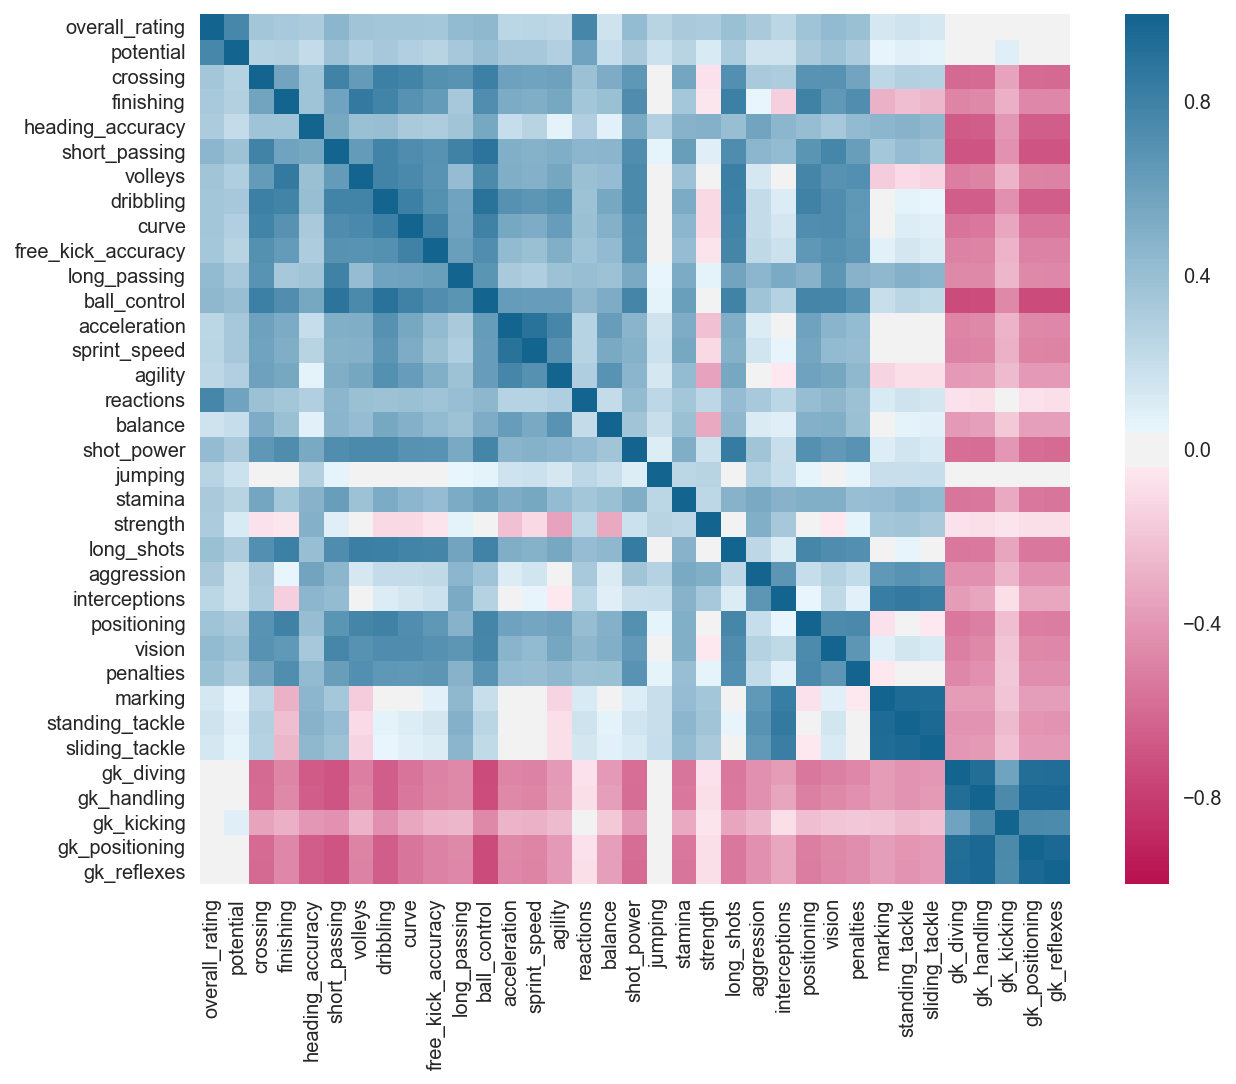

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap=sns.diverging_palette(0, 240, s=95, l=40, as_cmap=True),
            square=True, ax=ax)

#Optional: rotate & align tick labels
#for tick in ax.get_xticklabels():
#    print(tick)
#    tick.set_rotation(80)
#    tick.set_horizontalalignment('right')

Now it is easier to see the dependence between the skills. 

It can be confirmed the initial statement about the weak dependence of the data, but some exceptions, e.g. GK related skills and Defensive skills, which make sense, can be also noticed.

*Note that the main diagonal of the matrix has a correlation factor of 1.0 because is shows the correlation of the attribute itself.* 

It is really interesting that the correlation values of the *overall_rating* are surprisingly low which can indicate the use of a complex formula to calculate that parameter.

A bit of searching on the web can reinforce this hypothesis; this [article](https://www.vg247.com/2016/09/27/how-ea-calculates-fifa-17-player-ratings/) an EA representative explains that the formula used for the overall rating is more complex in the sense that are many other parameters that should be considered, for instance real-life performance and the specific league in which a player plays, among some others. The following is an excerpt of the this article: 

*«All that data is then put into a formula, which spits out the rating we see in game. However, some players just don’t work well with this formula, meaning they end up getting rated much lower than their real-world performance would indicate.*

*Mueller-Moehring gives the example of Thomas Muller, who isn’t particularly good at any one thing, according to him. “He always finds the right spot on the pitch, it’s amazing. But he’s not a great dribbler and he can’t really strike the ball properly — his finishing is sometimes really, really off. Shot power is not his strength as well,” he went on.*

*“So if you rate Thomas Muller properly, he ends up with a rating that we say doesn’t make sense. It’s too low.”»*

## Conclusions

- The dataset is extended and it includes historical updates on the skills of players, this allows a better analysis since much more data can be included.

- A direct relationship between the related parameters, e.g. jumping with heading, GK skills, defensive skills and so forth, however the correlation values show this relationship is not as strong as one would expect.

- This analysis could indicate the use of a complex formula in the calculation of the *overall_rating* of the player.

- The correlation matrix analysis therefore is not conclusive in this specific case.

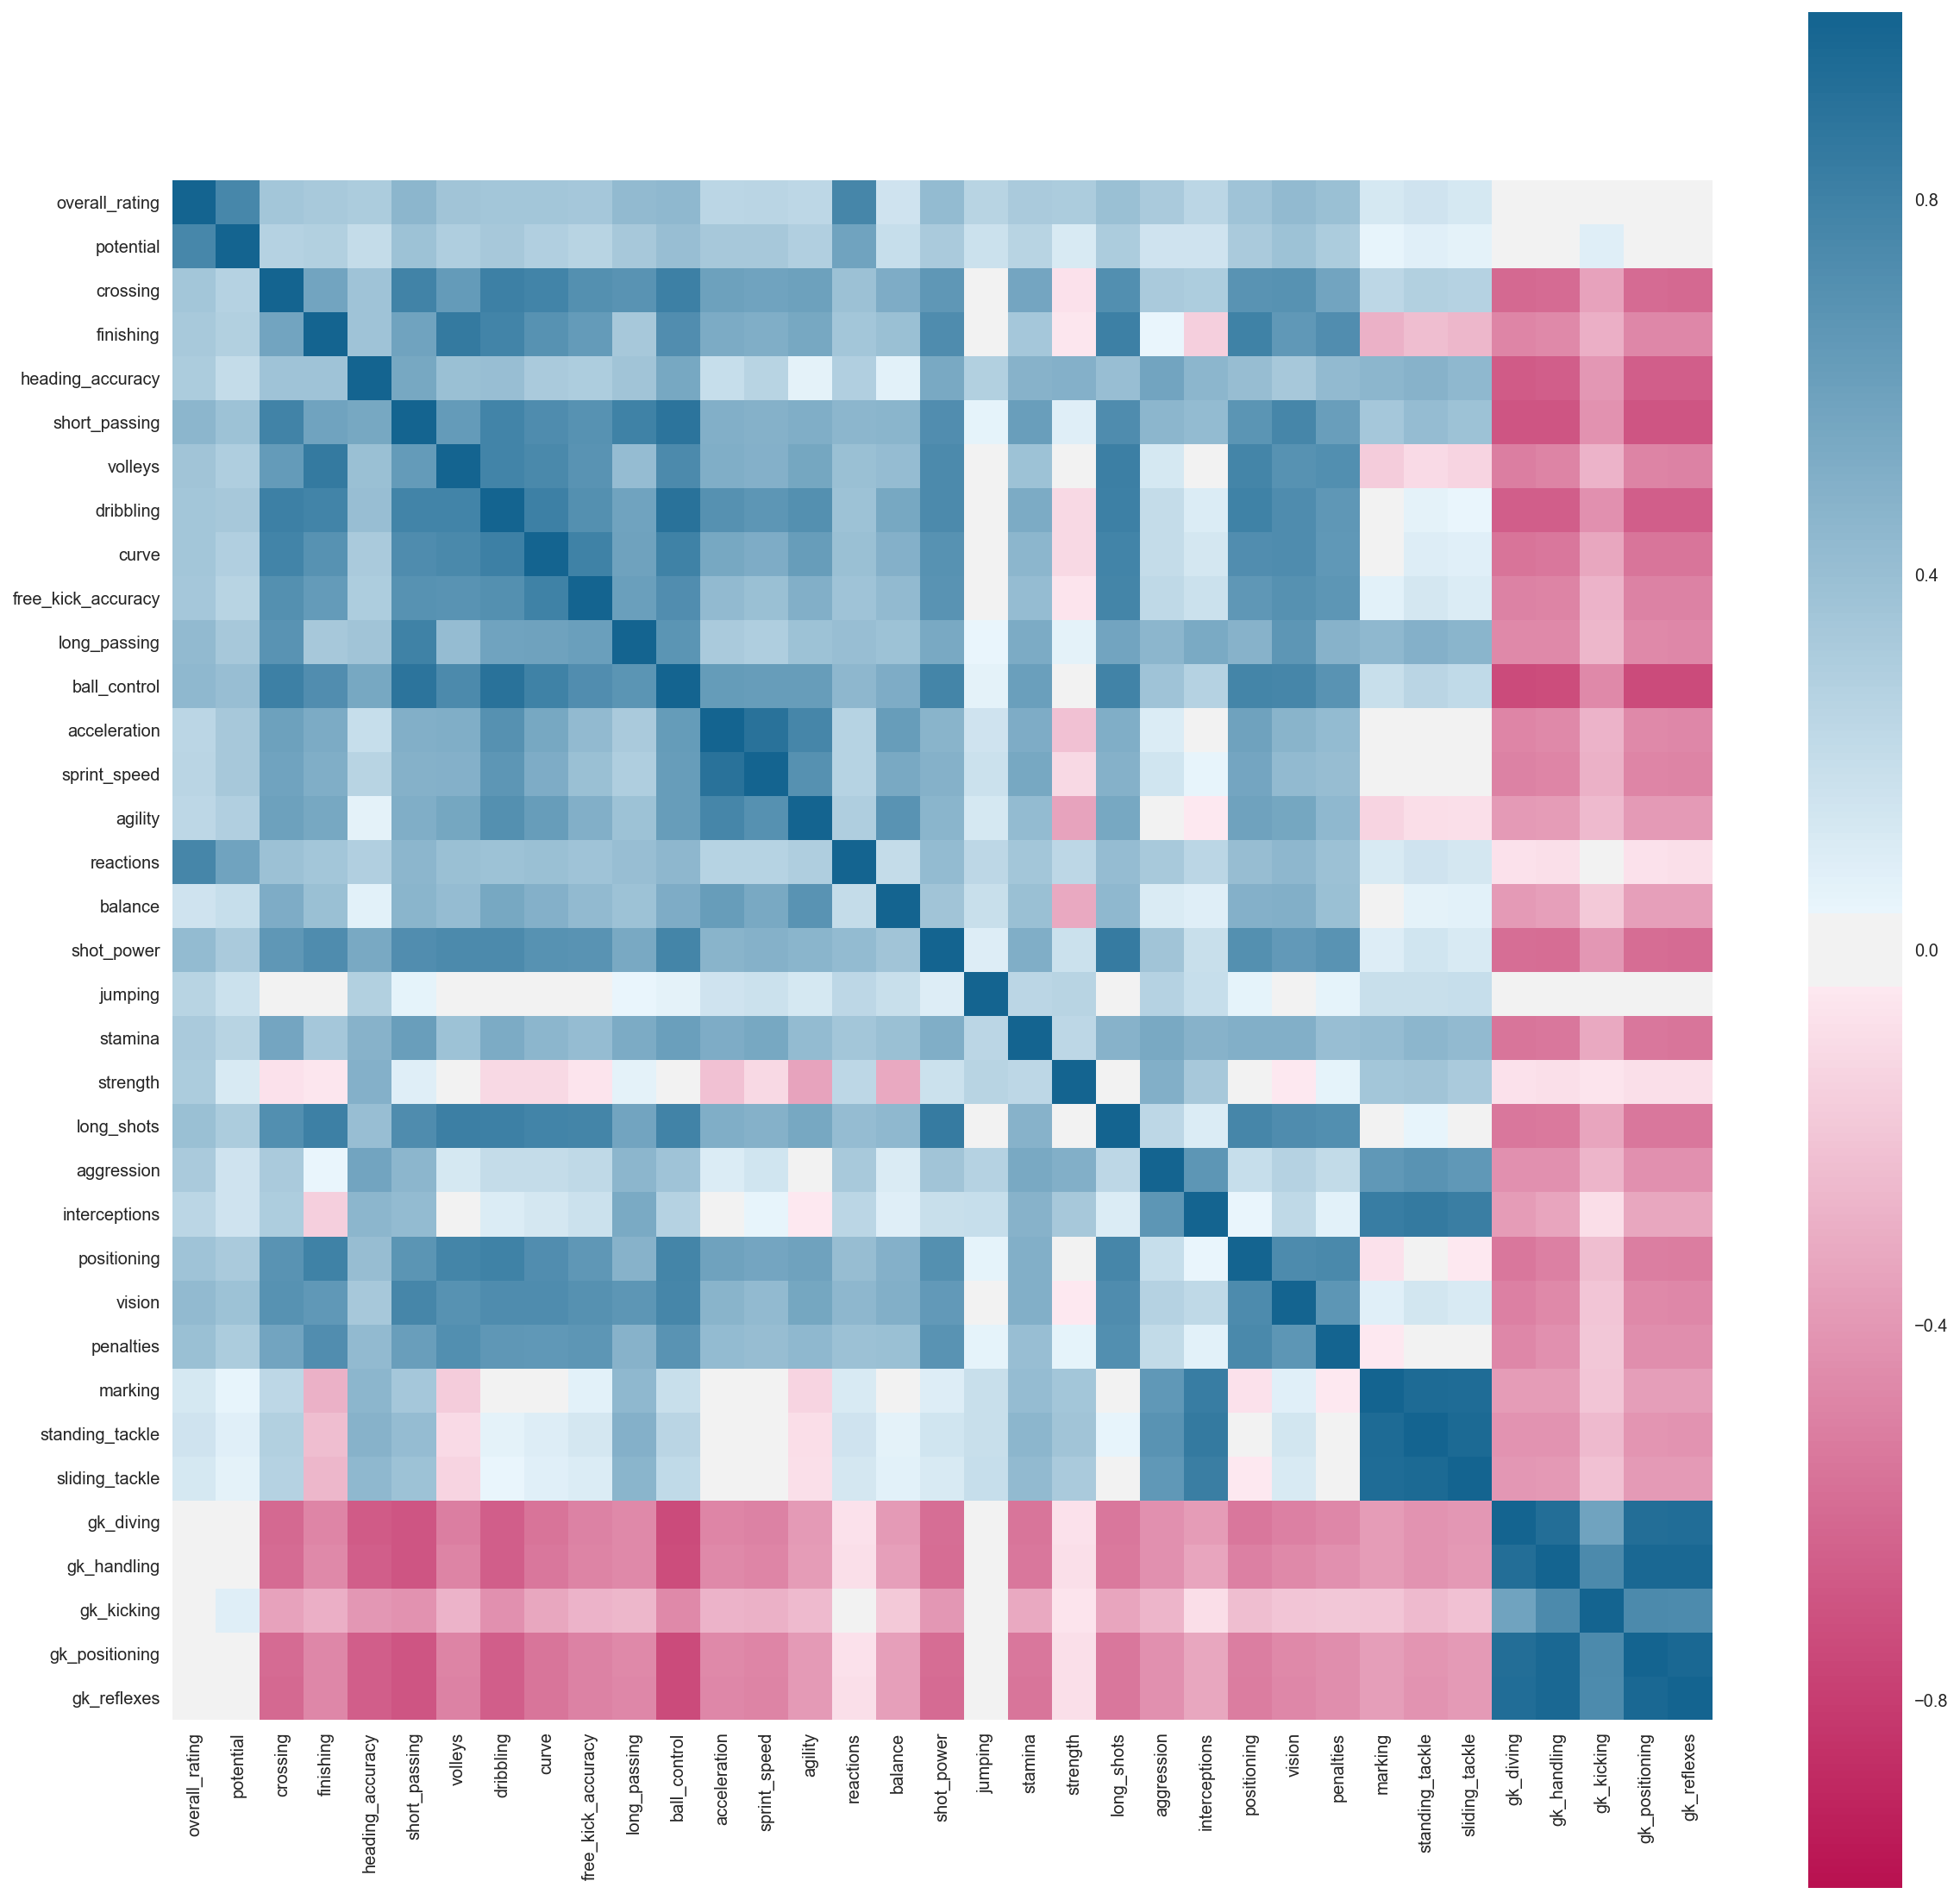

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap=sns.diverging_palette(0, 240, s=95, l=40, as_cmap=True),
            square=True)
f.savefig("corr.png")
